In [ ]:
# This notebook is created by Jinyang on 09/10/2024

/bin/bash: line 1: /opt/bin/nvidia-smi: No such file or directory


In [ ]:
pip install cartopy netCDF4

In [ ]:
import sys
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import matplotlib.patches as patches

In [ ]:
CAMELS_ROOT = Path('/content/drive/MyDrive/camels/basin_dataset_public_v1p2')
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from data_general_static import *

In [ ]:
#Load the selected basin lists
with open('/content/drive/MyDrive/Colab Notebooks/basin_list.txt', 'r') as f:
  basin_list = f.readlines()
  for i, basin in enumerate(basin_list):
    basin = basin.strip('\n')
    basin_list[i] = basin

In [ ]:
# Load saved results
lstm = np.load('/content/drive/MyDrive/Colab Notebooks/results/lstm/lstm_maurer_0.705_0.738.npy')
lstm4 = np.load('/content/drive/MyDrive/Colab Notebooks/results/lstm/lstm_daymet_aug_0.726_0.765.npy')

attention1 = np.load('/content/drive/MyDrive/Colab Notebooks/results/attention/maurer_0.718_0.75.npy')
attention2 = np.load('/content/drive/MyDrive/Colab Notebooks/results/attention/daymet_0.725_0.76.npy')
attention3 = np.load('/content/drive/MyDrive/Colab Notebooks/results/attention/maurer_aug_0.729_0.764.npy')
attention4 = np.load('/content/drive/MyDrive/Colab Notebooks/results/attention/daymet_aug_0.743_0.781.npy')

In [ ]:
# @title Summary of NSE, KGE, FLV, FMV, FHV
from tabulate import tabulate
table = [
    ["Maurer-9-year",  np.count_nonzero(np.argwhere(attention1[:,1]<0)), np.median(attention1, axis=0)[1], np.median(attention1, axis=0)[2],
     np.median(attention1, axis=0)[3], np.median(attention1, axis=0)[4], np.median(attention1, axis=0)[5]],
    ["Daymet-9-year",  np.count_nonzero(np.argwhere(attention2[:,1]<0)), np.median(attention2, axis=0)[1], np.median(attention2, axis=0)[2],
     np.median(attention2, axis=0)[3], np.median(attention2, axis=0)[4], np.median(attention2, axis=0)[5]],
    ["Maurer-14-year", np.count_nonzero(np.argwhere(attention3[:,1]<0)), np.median(attention3, axis=0)[1], np.median(attention3, axis=0)[2],
     np.median(attention3, axis=0)[3], np.median(attention3, axis=0)[4], np.median(attention3, axis=0)[5]],
    ["Daymet-14-year", np.count_nonzero(np.argwhere(attention4[:,1]<0)), np.median(attention4, axis=0)[1], np.median(attention4, axis=0)[2],
     np.median(attention4, axis=0)[3], np.median(attention4, axis=0)[4], np.median(attention4, axis=0)[5]],
]

headers = ['Settings', 'No. of bains with NSE < 0', 'NSE', 'KGE', 'FLV', 'FMV', 'FHV']
alignments = ["center"] * len(headers)
print(tabulate(table, headers=headers, floatfmt=".3f", tablefmt="grid", colalign=alignments))


+----------------+-----------------------------+-------+-------+---------+---------+--------+
|    Settings    |  No. of bains with NSE < 0  |  NSE  |  KGE  |   FLV   |   FMV   |  FHV   |
+================+=============================+=======+=======+=========+=========+========+
| Maurer-9-year  |              0              | 0.750 | 0.788 | -77.317 | -1.126  | -7.833 |
+----------------+-----------------------------+-------+-------+---------+---------+--------+
| Daymet-9-year  |              1              | 0.760 | 0.767 | -48.351 | -9.062  | -4.594 |
+----------------+-----------------------------+-------+-------+---------+---------+--------+
| Maurer-14-year |              1              | 0.764 | 0.777 | -57.458 | -16.626 | -2.173 |
+----------------+-----------------------------+-------+-------+---------+---------+--------+
| Daymet-14-year |              0              | 0.781 | 0.808 | -24.693 | -28.602 | 5.757  |
+----------------+-----------------------------+-------+----

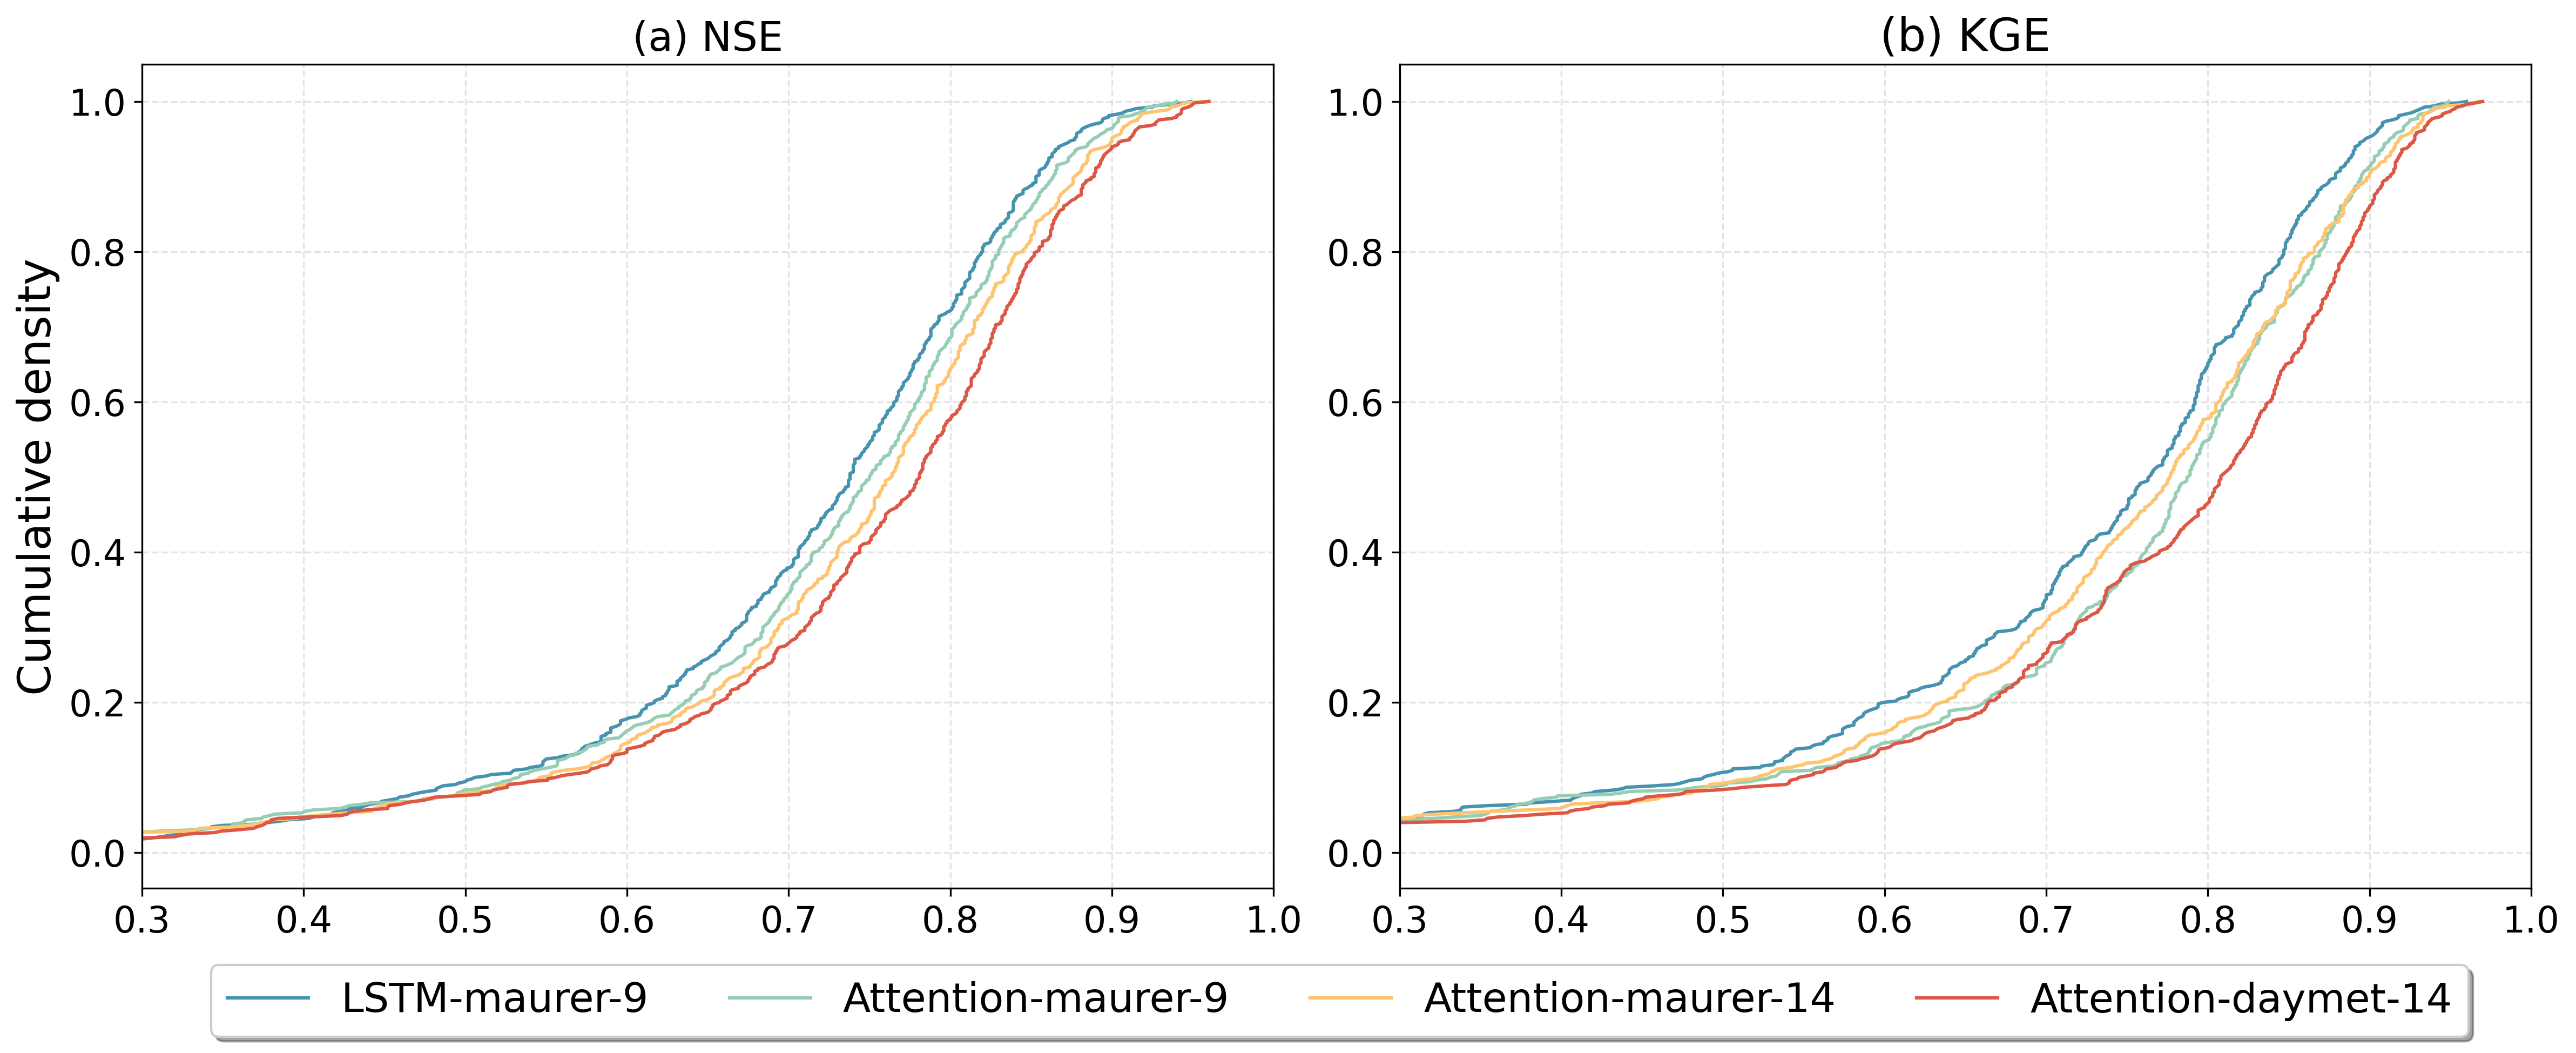

In [ ]:
# @title CDF plots
def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs) + 1) / float(len(xs))
    return xs, ys

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=300)
bin1, cdf1 = ecdf(lstm[:,1])
bin2, cdf2 = ecdf(attention1[:,1])
bin4, cdf4 = ecdf(attention3[:,1])
bin5, cdf5 = ecdf(attention4[:,1])

ax1.plot(bin1, cdf1, label ='LSTM-maurer-9', color = '#4793AF')
ax1.plot(bin2, cdf2, label ='Attention-maurer-9', color = '#96CEB4')
ax1.plot(bin4, cdf4, label ='Attention-maurer-14', color = '#FFC470')
ax1.plot(bin5, cdf5, label ='Attention-daymet-14', color = '#DD5746')
ax1.tick_params(axis='both', which='major', labelsize=16)

ax1.set_xlim(0.3, 1)
ax1.grid(True, linestyle='--', color='lightgrey', alpha=0.6)
ax1.set_title('(a) NSE', fontsize=18)
ax1.set_ylabel('Cumulative density', fontsize=20)

bin12, cdf12 = ecdf(lstm[:,2])
bin22, cdf22 = ecdf(attention1[:,2])
bin42, cdf42 = ecdf(attention3[:,2])
bin52, cdf52 = ecdf(attention4[:,2])

lns1 = ax2.plot(bin12, cdf12, label ='LSTM-maurer-9', color = '#4793AF')
lns2 = ax2.plot(bin22, cdf22, label ='Attention-maurer-9', color = '#96CEB4')
lns3 = ax2.plot(bin42, cdf42, label ='Attention-maurer-14', color = '#FFC470')
lns4 = ax2.plot(bin52, cdf52, label ='Attention-daymet-14', color = '#DD5746')
ax2.tick_params(axis='both', which='major', labelsize=16)

ax2.set_xlim(0.3, 1)
ax2.grid(True, linestyle='--', color='lightgrey', alpha=0.6)
ax2.set_title('(b) KGE', fontsize=20)

lns = lns1  + lns2 +  lns3 + lns4
labs = [l.get_label() for l in lns]
fig.legend(lns, labs, loc='upper center', fontsize= 18,  bbox_to_anchor=(0.52, 0.02), fancybox=True, shadow=True, ncol=5)

plt.tight_layout()
plt.show()

In [ ]:
# @title Load the saved catchemnt attributes
db_path = Path(CAMELS_ROOT) / 'attributes.db'
attributes2 = load_attributes(db_path, basin_list, drop_lat_lon = False)
column_names = attributes2.columns
print(column_names)
#attributes2 = attributes.copy().values
#attribute_means = attributes.mean(axis= 0)
#attribute_stds = attributes.std(axis= 0)
#attributes = (attributes - attribute_means)/attribute_stds

feature_name = ['Frac. of carbonate sedimentary rock', 'Subsurface permeability',  'Mean daily precip.', 'Mean daily PET',
       'Precip. seasonality', 'Snow fraction', 'Aridity', 'Freq. of high precip. days',
       'High precip. duration', 'Freq. of dry days', 'Low precip. duration',
       'Soil depth to bedrock', 'Soil depth', 'Soil porosity',
       'Soil conductivity', 'Max. water content', 'Sand fraction', 'Silt fraction',
       'Clay fraction', 'gauge_lat', 'gauge_lon','Mean elevation', 'Mean slope','Area', 'Forest fraction',
       'Max. leaf area index', 'Annual leaf area index diff.', 'Max. green veg. frac.', 'Annual green veg. frac.']
attributes2.columns = feature_name
attributes2 = attributes2.reindex(basin_list)  # attributes.db is sequential, while model results follows basin_list (not sequential)
attributes = attributes2.drop(columns=['gauge_lat', 'gauge_lon'])
attributes.head()

Index(['carbonate_rocks_frac', 'geol_permeability', 'p_mean', 'pet_mean',
       'p_seasonality', 'frac_snow', 'aridity', 'high_prec_freq',
       'high_prec_dur', 'low_prec_freq', 'low_prec_dur',
       'soil_depth_pelletier', 'soil_depth_statsgo', 'soil_porosity',
       'soil_conductivity', 'max_water_content', 'sand_frac', 'silt_frac',
       'clay_frac', 'gauge_lat', 'gauge_lon', 'elev_mean', 'slope_mean',
       'area_gages2', 'frac_forest', 'lai_max', 'lai_diff', 'gvf_max',
       'gvf_diff'],
      dtype='object')


,Frac. of carbonate sedimentary rock,Subsurface permeability,Mean daily precip.,Mean daily PET,Precip. seasonality,Snow fraction,Aridity,Freq. of high precip. days,High precip. duration,Freq. of dry days,...,Silt fraction,Clay fraction,Mean elevation,Mean slope,Area,Forest fraction,Max. leaf area index,Annual leaf area index diff.,Max. green veg. frac.,Annual green veg. frac.
gauge_id,,,,,,,,,,,,,,,,,,,,,
01022500,0.000000,-14.2138,3.608126,2.119256,-0.114530,0.245259,0.587356,20.55,1.205279,233.65,...,28.080937,12.037646,92.68,17.79072,573.60,0.9232,4.871392,3.746692,0.863936,0.337712
01031500,0.026258,-14.8410,3.522957,2.071324,0.104091,0.291836,0.587950,18.90,1.148936,227.35,...,50.841232,12.654125,247.80,29.56035,769.05,0.9548,4.903259,3.990843,0.870668,0.398619
01047000,0.000000,-14.4819,3.323146,2.090024,0.147776,0.280118,0.628929,20.10,1.165217,235.90,...,34.185443,10.303622,310.38,49.92122,909.10,0.9906,5.086811,4.300978,0.891383,0.445473
01052500,0.000000,-15.1658,3.730858,2.096423,0.152097,0.352698,0.561914,13.50,1.129707,193.50,...,52.614646,11.143326,615.70,60.05183,383.82,1.0000,4.800830,4.124313,0.880034,0.477328
01054200,0.000000,-14.2147,4.067132,2.128355,0.104960,0.299642,0.523306,17.50,1.194539,220.30,...,31.836472,9.851262,472.31,90.13951,180.98,1.0000,5.019827,4.283551,0.886711,0.455084


In [ ]:
lats, lons, basin_ID = [], [], []
for basin in basin_list:
    basin_ID.append(basin)  # assuming basin is already the ID you want
    lats.append(attributes2.loc[attributes2.index == basin, 'gauge_lat'].values[0])
    lons.append(attributes2.loc[attributes2.index == basin, 'gauge_lon'].values[0])

In [ ]:
# @title Spatial distribution of NSE and KGE

titles = ['(a) NSE', '(b) KGE', '(a) NSE difference', '(b) KGE difference']
c_values = [attention4[:,1], attention4[:,2], (attention4[:,1] - lstm4[:,1]), (attention4[:,2] - lstm4[:,2])]
vmins = [0, 0, -1, -1]
vmaxs = [1, 1, 1, 1]

# Define colormap and levels for difference plots
levels1 = np.linspace(0, 1, 11)
cmap1 = plt.get_cmap('rainbow', len(levels1) - 1)
norm1 = mcolors.BoundaryNorm(boundaries=levels1, ncolors=len(levels1) - 1)

levels2 = np.linspace(-0.4, 0.4, 11)
cmap2 = plt.get_cmap('coolwarm', len(levels2) - 1)
norm2 = mcolors.BoundaryNorm(boundaries=levels2, ncolors=len(levels2) - 1)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), dpi=300, subplot_kw={'projection': ccrs.Mercator()})
cbar_ax1 = fig.add_axes([0.88, 0.51, 0.01, 0.44])  # Right of the first row of plots
cbar_ax2 = fig.add_axes([0.88, 0.02, 0.01, 0.44])  # Right of the second row of plots
states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', linestyle='--', scale='50m', facecolor='none', edgecolor='black')
# Iterate over subplots
for i, ax in enumerate(axs.flatten()):
    title, c, vmin, vmax  = titles[i], c_values[i], vmins[i], vmaxs[i]

    inset_ax = ax.inset_axes([0.81, 0.14, 0.17, 0.19])  #[left, bottom, width, height]
    inset_ax.hist(c, bins=np.linspace(-0.3, 1, 19 + 1),  color='dodgerblue', alpha=0.7, edgecolor='black')

    # Select colormap based on row
    if i in [0, 1]:
        sc = ax.scatter(lons, lats, c=c, s=60, cmap=cmap1, norm=norm1, #vmin=0, vmax=1, cmap = 'rainbow',
                        edgecolor='#333333', linewidth=0.8, transform=ccrs.PlateCarree())
        median_value = np.median(c)
        inset_ax.axvline(median_value, color='red', linestyle='--', linewidth=1.5)

        inset_ax.set_xlim(-0.35, 1)
        inset_ax.set_ylim(0, 180)
    else:
        sc = ax.scatter(lons, lats, c=c, s=60, cmap=cmap2, norm=norm2, #vmin=-0.6, vmax=0.6, cmap = 'coolwarm',
                        edgecolor='#333333', linewidth=0.8, transform=ccrs.PlateCarree())
        inset_ax.axvline(0, color='black', linestyle='--', linewidth=1)
        inset_ax.set_xlim(-0.4, 0.4)
        inset_ax.set_ylim(0, 350)
    # Add histgram in appropriate place
    if i == 1:
        fig.colorbar(sc, cax=cbar_ax1, orientation='vertical')
    if i == 2:
        ax.text(0.85, 0.28, '36.3%', transform=ax.transAxes, fontsize=12, color='black',  ha='center', va='center', zorder=10)
        ax.text(0.94, 0.28, '63.7%', transform=ax.transAxes, fontsize=12, color='black',  ha='center', va='center', zorder=10)
    if i == 3:
        fig.colorbar(sc, cax=cbar_ax2, orientation='vertical')
        ax.text(0.85, 0.28, '26.7%', transform=ax.transAxes, fontsize=12, color='black',  ha='center', va='center', zorder=10)
        ax.text(0.94, 0.28, '73.3%', transform=ax.transAxes, fontsize=12, color='black',  ha='center', va='center', zorder=10)

    # Add map features
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='black', linewidth=1)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), edgecolor='black', linewidth=1)
    ax.add_feature(states, edgecolor='black', linewidth=0.6)
    ax.set_extent([-126, -65, 24, 50], crs=ccrs.PlateCarree())
    ax.set_title(title, fontsize=20)

plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# @title Calcualte KGE and NSE improvement
Diffrence = np.ones((531, 3))
Diffrence[:, 0] = attention4[:, 1]
Diffrence[:, 1] = attention4[:, 1] - lstm4[:, 1]
Diffrence[:, 2] = attention4[:, 2] - lstm4[:, 2]
print(f' NSE improvement: {len(Diffrence[Diffrence[:,1]>0])/len(Diffrence)*100:.1f}%')
print(f' KGE improvement: {len(Diffrence[Diffrence[:,2]>0])/len(Diffrence)*100:.1f}%')

 NSE improvement: 63.7%
 KGE improvement: 73.3%


In [ ]:
titles = ['(a) Forest fraction', '(b) Mean daily precip.', '(c) Freq. of dry days', '(d) Aridity']
c_values = [attributes2['Forest fraction'], attributes2['Mean daily precip.'], attributes2['Freq. of dry days'], attributes2['Aridity']]
sub_titles =['%', 'mm', 'days', '']
vmins = [0, 1, 150, 0.2]
vmaxs = [1, 9, 340, 4]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), dpi=300, subplot_kw={'projection': ccrs.Mercator()})
for ax, title, subtitle, c, vmin, vmax in zip(axs.flatten(), titles, sub_titles, c_values, vmins, vmaxs):
    # Add map features
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='black', linewidth=1)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), edgecolor='black', linewidth=1)
    ax.add_feature(states, edgecolor='black', linewidth=0.6)  # assuming states is defined

    sc = ax.scatter(lons, lats, c=c, vmin=vmin, vmax=vmax, cmap='Spectral', s = 60,
                    edgecolor='black', linewidth=0.8, transform=ccrs.PlateCarree())

    inset_ax = ax.inset_axes([0.82, 0.12, 0.17, 0.21])
    inset_ax.hist(c, bins=20,  color='dodgerblue', alpha=0.7, edgecolor='black')
    median_value = np.median(c)
    inset_ax.axvline(median_value, color='red', linestyle='--', linewidth=1.5)

    # Set the extent to cover only the contiguous United States
    ax.set_extent([-126, -66.5, 24, 50], crs=ccrs.PlateCarree())
    ax.set_title(title, fontsize=20)
    clb = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.9)
    clb.ax.set_title(subtitle, fontsize=16)

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# @title Visulize selected catchements for Attention weights analysis
highlight_basins = ['12013500', '11264500',  '02231000']
basin_names = ['(a) 12013500', '(b) 11264500',  '(c) 02231000']
highlight_coords = [(attributes2.loc[basin, 'gauge_lon'], attributes2.loc[basin, 'gauge_lat']) for basin in highlight_basins]

colors = ['#f07167', '#fed9b7', '#fdfcdc', '#00afb9', '#0081a7']
levels1 = np.linspace(0, 1, 6)
cmap1 = mcolors.ListedColormap(colors)
norm1 = mcolors.BoundaryNorm(boundaries=levels1, ncolors=len(colors))
levels2 = np.linspace(0, 255, 6)
cmap2 = mcolors.ListedColormap(colors)
norm2 = mcolors.BoundaryNorm(boundaries=levels2, ncolors=len(colors))

titles = ['(a) Snow fraction', '(b) Mean slope']
c_values = [attributes2['Snow fraction'], attributes2['Mean slope']]
sub_titles =[' ', 'm/km']
cmaps = [cmap1, cmap2]
norms = [norm1, norm2]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), dpi=300, subplot_kw={'projection': ccrs.Mercator()})
# Loop through each subplot
for ax, title, subtitle, c,  cmap, norm in zip(axs.flatten(), titles, sub_titles, c_values, cmaps, norms):
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='black', linewidth=1)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), edgecolor='black', linewidth=1)
    ax.add_feature(states, edgecolor='black', linewidth=0.6)  # assuming states is defined
    sc = ax.scatter(lons, lats, c=c, cmap=cmap, norm=norm,  s = 60,    #vmin=vmin, vmax=vmax, cmap='Spectral',
                    edgecolor='black', linewidth=0.8, transform=ccrs.PlateCarree())

    for (lon, lat), basin in zip(highlight_coords, basin_names):
      square = patches.Rectangle((lon-0.9, lat-0.9), 1.8, 1.8, linewidth=2.5, linestyle='--', edgecolor='limegreen', facecolor='none',
                               transform=ccrs.PlateCarree())
      ax.add_patch(square)
      ax.text(lon + 1.6, lat, basin, fontsize=16, transform=ccrs.PlateCarree(), verticalalignment='center',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    ax.set_extent([-126, -66.5, 24, 50], crs=ccrs.PlateCarree())
    ax.set_title(title, fontsize=20)
    clb = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.45)
    clb.ax.set_title(subtitle, fontsize=16)

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# @title Calculate correlations between the attributes and KGE/learned embeddiing activation
embededa, _ = np.load('/content/drive/MyDrive/Colab Notebooks/results/embed_attributes0324.npz').values()

#Attention: correlations between attribute and learned embeddiing activation
e_df = pd.DataFrame(np.ones((27, 2)), columns = ['name', 'correlation'])#
e_df['name'] = attributes.columns.T
for i in range(27):
  e_df.loc[i, 'correlation'] = np.corrcoef(attributes.iloc[:,i], embededa.sum(axis=1))[0,1]

e_df = e_df.sort_values(by='correlation', ascending=True)

#Attention: correlations between attribute and KGE
df = pd.DataFrame(np.ones((27,2)), columns = ['name', 'correlation'])
attributes = attributes.reindex(basin_list)
df['name'] = attributes.columns.T
for i in range(27):
  df.loc[i, 'correlation'] = np.corrcoef(attributes.iloc[:,i], attention4[:,2])[0,1]

df = df.sort_values(by='correlation', ascending=True)

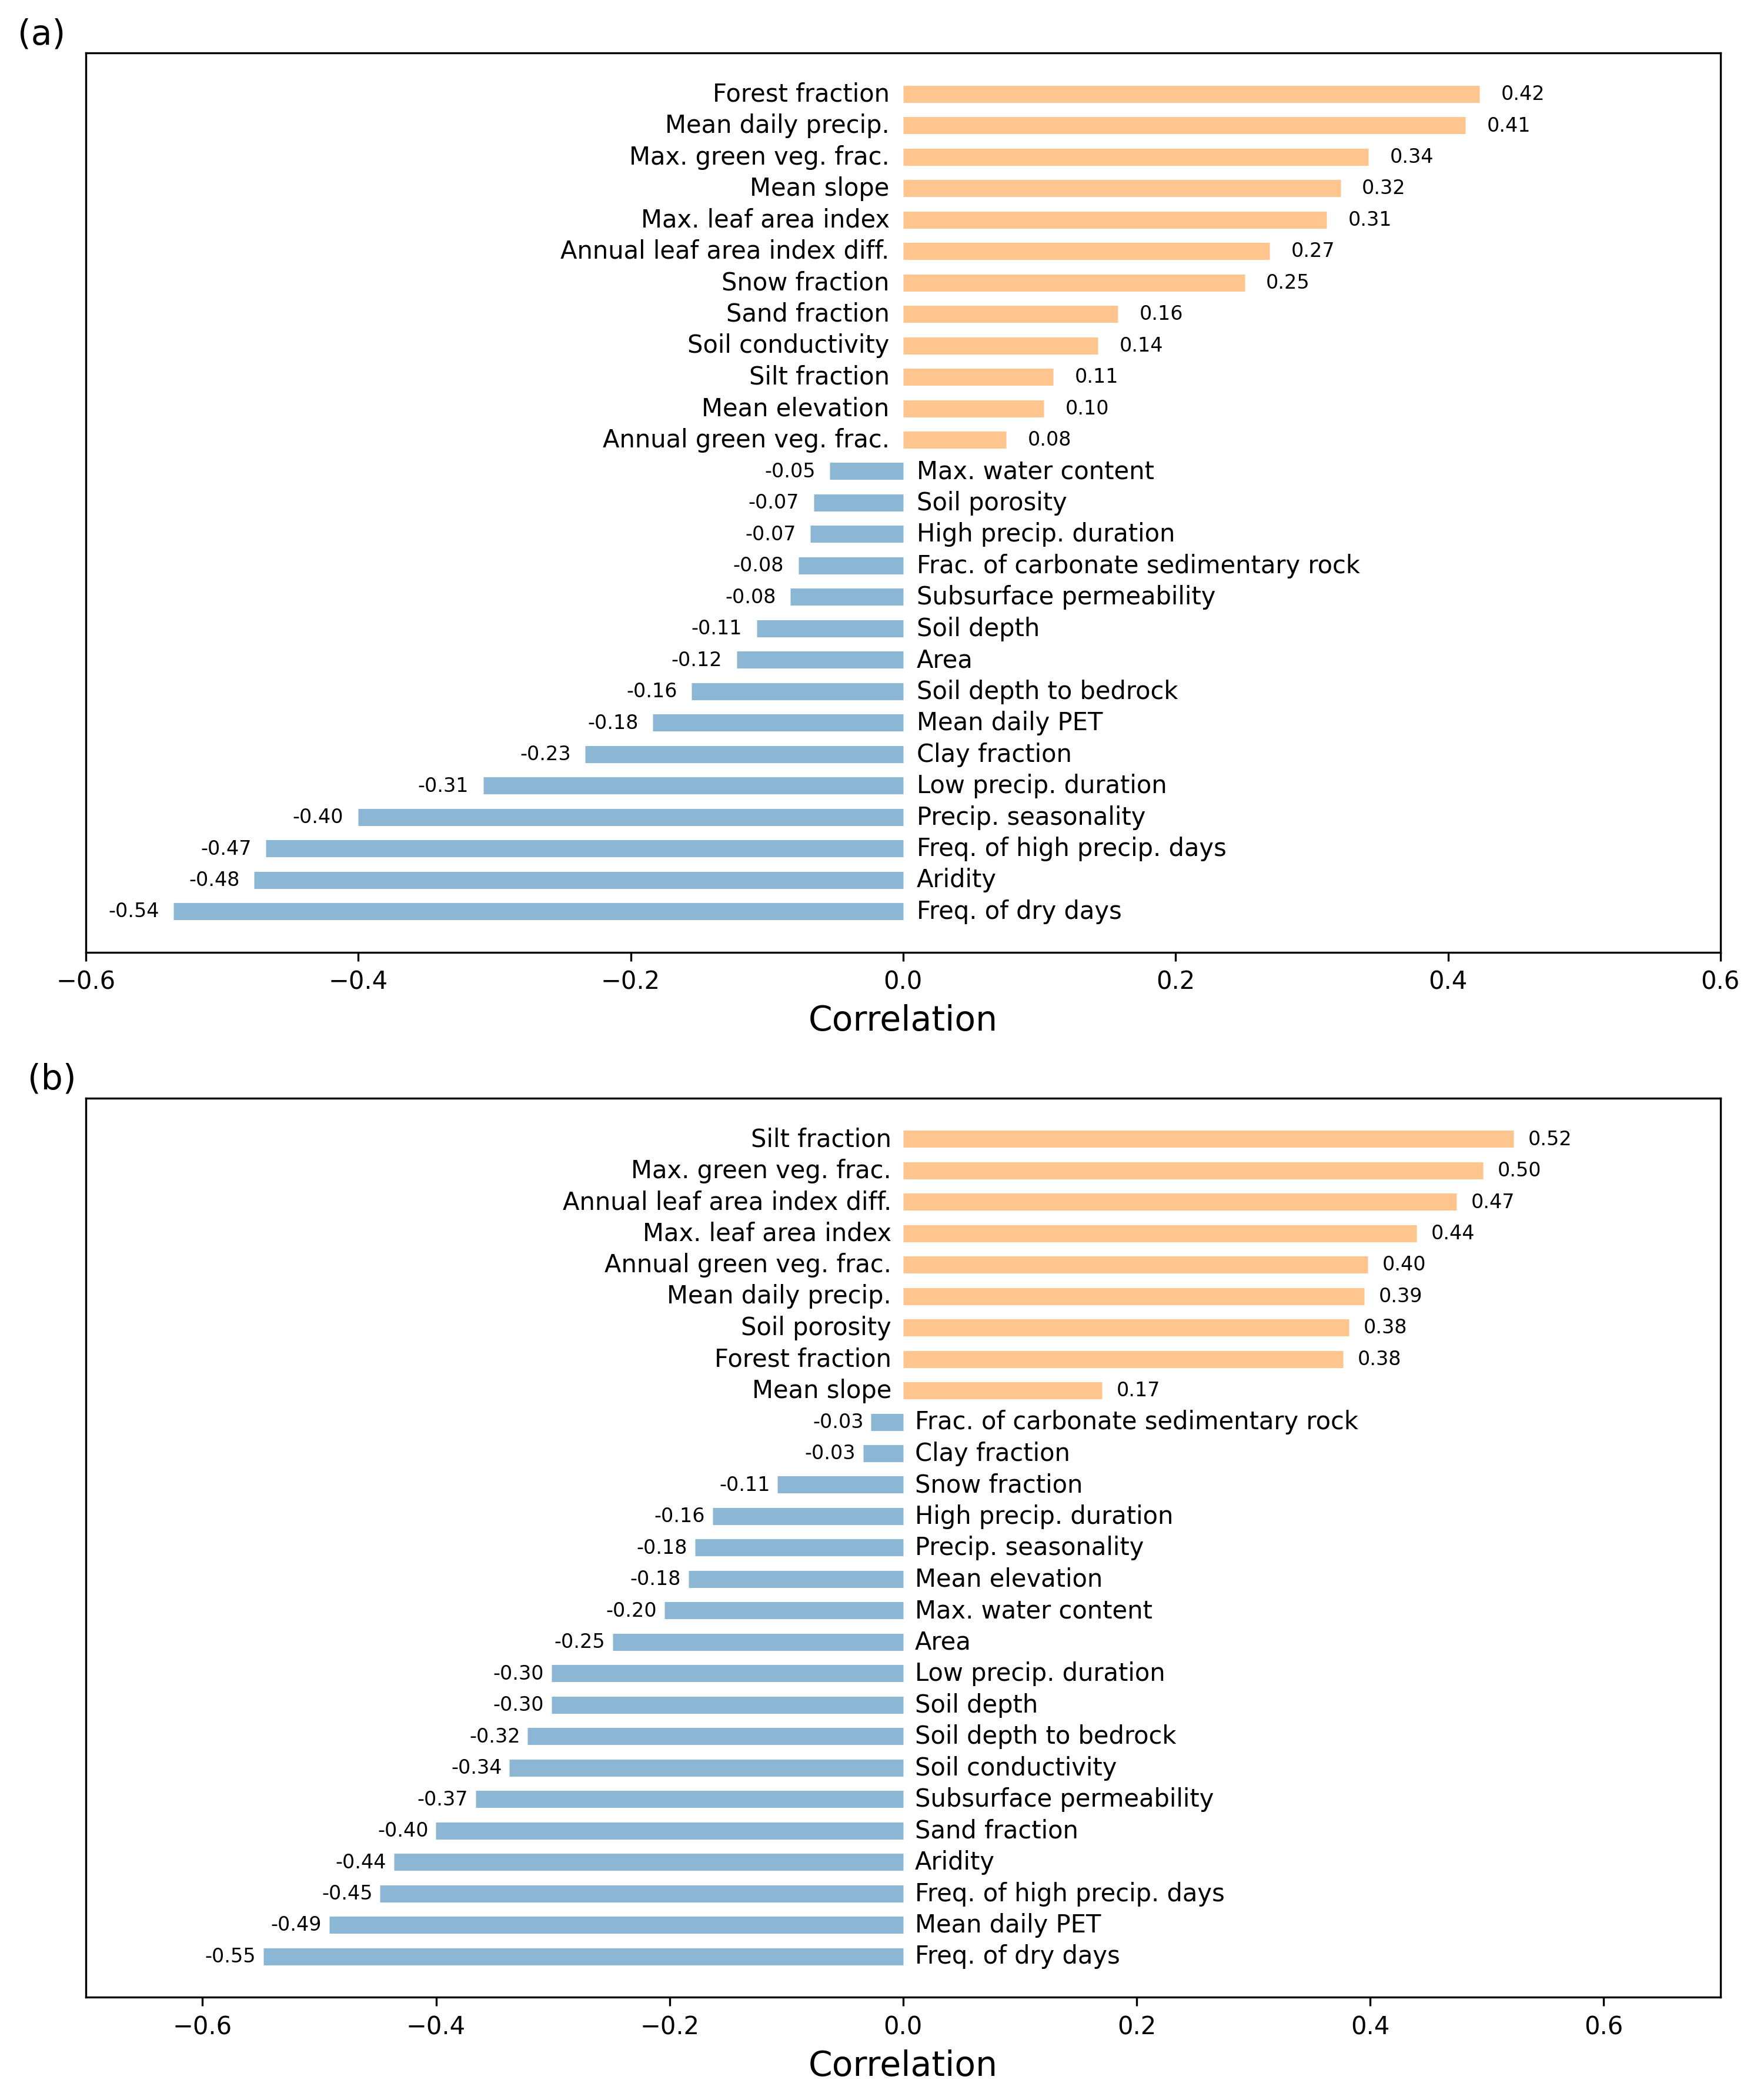

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 12), dpi=300)
df['colors'] = ['#5B99C2' if float(x) < 0 else '#FFAD60' for x in df['correlation']]
e_df['colors'] = ['#5B99C2' if float(x) < 0 else '#FFAD60' for x in e_df['correlation']]
# First plot, KGE vs attributes
axs[0].hlines(y=df['name'], xmin=0, xmax=df['correlation'], color=df['colors'], alpha=0.7, linewidth=7, zorder=2)
for i in range(len(df)):
    y = df['name'][i]
    correlation = df['correlation'][i]
    if correlation < 0:
        axs[0].text(0.01, y, y, va='center', ha='left', fontsize=10, color='black', zorder=3)
        axs[0].text(correlation-0.048, y, f"{correlation:.2f}", va='center', ha='left', fontsize=8, color='black', zorder=3)
    else:
        axs[0].text(-0.01, y, y, va='center', ha='right', fontsize=10, color='black', zorder=3)
        axs[0].text(correlation+0.048, y, f"{correlation:.2f}", va='center', ha='right', fontsize=8, color='black', zorder=3)
axs[0].set_xlim(-0.6, 0.6)
axs[0].set_xlabel('Correlation', fontsize=14)
axs[0].set_yticks([])
axs[0].text(-0.65, len(df)+0.6, '(a)', fontsize=14,  ha='left')

# Second plot learned weights vs attributes
axs[1].hlines(y=e_df['name'], xmin=0, xmax=e_df['correlation'], color=e_df['colors'], alpha=0.7, linewidth=7, zorder=2)
for i in range(len(df)):
    y = e_df['name'][i]
    correlation = e_df['correlation'][i]
    if correlation < 0:
        axs[1].text(0.01, y, y, va='center', ha='left', fontsize=10, color='black', zorder=3)
        axs[1].text(correlation-0.05, y, f"{correlation:.2f}", va='center', ha='left', fontsize=8, color='black', zorder=3)
    else:
        axs[1].text(-0.01, y, y, va='center', ha='right', fontsize=10, color='black', zorder=3)
        axs[1].text(correlation+0.05, y, f"{correlation:.2f}", va='center', ha='right', fontsize=8, color='black', zorder=3)
axs[1].set_xlim(-0.7, 0.7)
axs[1].set_xlabel('Correlation', fontsize=14)
axs[1].set_yticks([])
axs[1].text(-0.75, len(e_df)+0.6, '(b)', fontsize=14, ha='left')

# Adjust layout
plt.tight_layout()

# Display the merged plot
plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5]),
 [Text(0, 0.5, 'Freq. of dry days'),
  Text(0, 1.5, 'Aridity'),
  Text(0, 2.5, 'Freq. of high precip. days'),
  Text(0, 3.5, 'Precip. seasonality'),
  Text(0, 4.5, 'Low precip. duration'),
  Text(0, 5.5, 'Clay fraction'),
  Text(0, 6.5, 'Mean daily PET'),
  Text(0, 7.5, 'Soil depth to bedrock'),
  Text(0, 8.5, 'Area'),
  Text(0, 9.5, 'Soil depth'),
  Text(0, 10.5, 'Subsurface permeability'),
  Text(0, 11.5, 'Frac. of carbonate sedimentary rock'),
  Text(0, 12.5, 'High precip. duration'),
  Text(0, 13.5, 'Soil porosity'),
  Text(0, 14.5, 'Max. water content'),
  Text(0, 15.5, 'Annual green veg. frac.'),
  Text(0, 16.5, 'Mean elevation'),
  Text(0, 17.5, 'Silt fraction'),
  Text(0, 18.5, 'Soil conductivity'),
  Text(0, 19.5, 'Sand fraction'),
  Text(0, 20.5, 'Snow fraction'),
  Text(0, 21.5, 'Annual lea

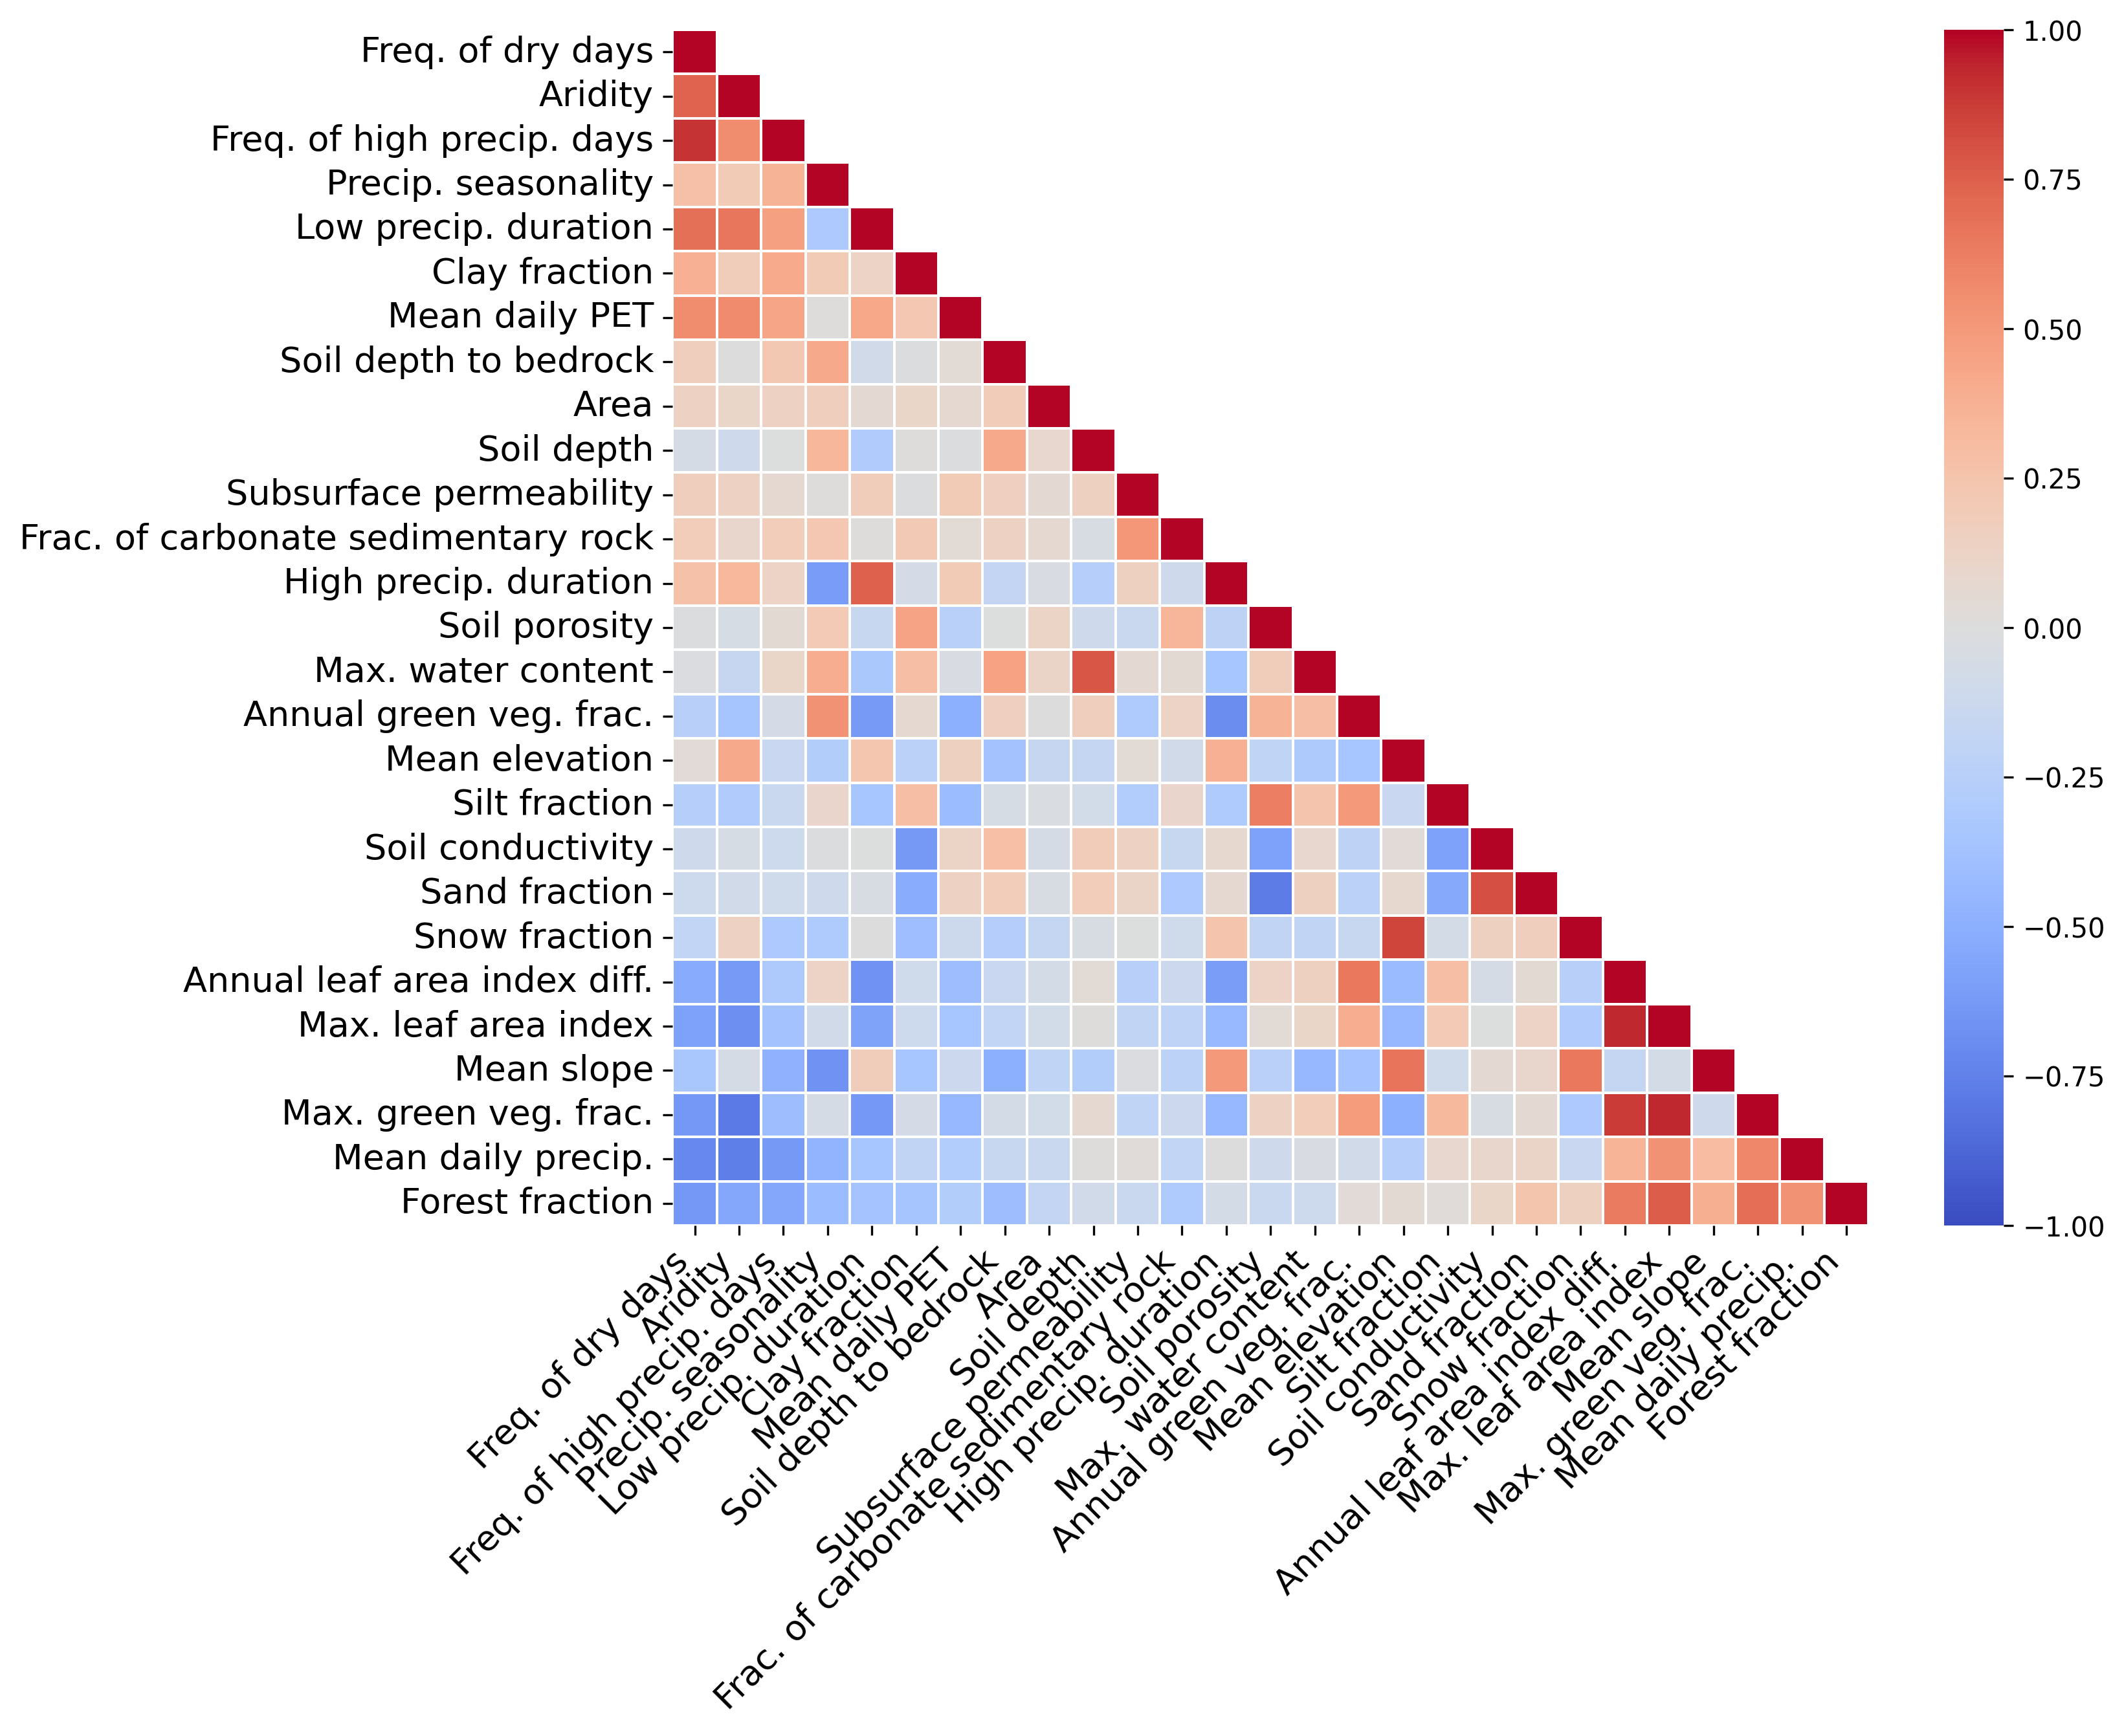

In [ ]:
# @title Calcualte the correlation between each catchemnt attributes
import seaborn as sns
attributes = attributes[df.name]
correlation = attributes.iloc[:,:].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
np.fill_diagonal(mask, False)
#np.fill_diagonal(correlation.values, np.nan)

fig, ax = plt.subplots(figsize=(10,8), dpi=300)
cmap = plt.colormaps.get_cmap('coolwarm')
cmap.set_bad("white")
sns.heatmap(correlation, vmin=-1, vmax=1, cmap = cmap, linewidth=.5, linecolor='white', mask=mask, square=True, cbar=True);
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.yticks( fontsize=13)